In [1]:
import pandas as pd
pd.set_option('display.max_columns', 21)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

Os dados podem ser encontrados [aqui](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=test.csv)

# Explicação dos dados

* battery_power: Total energy a battery can store in one time measured in mAh     
* blue: Has bluetooth or not  
* clock_speed: speed at which microprocessor executes instructions    
* dual_sim: Has dual sim support or not   
* fc: Front Camera mega pixels    
* four_g: Has 4G or not   
* int_memory: Internal Memory in Gigabytes    
* m_dep: Mobile Depth in cm     
* mobile_wt: Weight of mobile phone     
* n_cores: Number of cores of processor     
* pc: Primary Camera mega pixels    
* px_height: Pixel Resolution Height    
* px_width: Pixel Resolution Width  
* ram: Random Access Memory in Mega Bytes   
* sc_h: Screen Height of mobile in cm   
* sc_w: Screen Width of mobile in cm    
* talk_time: longest time that a single battery charge will last when you are   
* three_g: Has 3G or not    
* touch_screen: Has touch screen or not 
* wifi: Has wifi or not 
* price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


In [3]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df_train.shape

(2000, 21)

In [5]:
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0


In [6]:
quantitative_labels = df_train[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
quantitative_labels.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


Levando em conta apenas os dados quantitativos, podemos observar que o px_height e o sc_w tem pelo menos um dado com o valor 0, o que não é possível para telas. Preciso verificar melhor esses dados.
Já o fc e o pc eu irei considerar como celular que não tenham câmera, seja frontal ou principal.

In [7]:
df_train.query('px_height == 0 or sc_w == 0')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,13,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,19,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,19,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,591,1,0.5,1,1,1,16,0.9,90,6,17,892,1603,3746,5,0,5,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1
1946,590,1,1.2,1,0,0,32,0.4,141,6,1,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,1,64,745,1503,10,0,13,0,0,0,0


In [8]:
181/2000

0.0905

Caso eu retire esse dados estarei perdendo 9% de informações, mas acredito que seja válido, já que ele contém uma informação que não existe no dia a dia.   
Outro teste que possso tentar fazer é colocar a média ou mediana para esses valores zerados e ver se consigo alguma melhora, por mais que eu não considere a melhor prática nesse caso.

In [9]:
df_train = df_train.query('px_height != 0 and sc_w != 0')

In [10]:
quantitative_labels = df_train[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
quantitative_labels.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000
mean,1238.031336,1.519406,4.319956,32.156130,0.499835,140.578340,4.531061,9.882353,647.086861,1252.828477,2133.468939,12.488730,6.338098,11.009346
std,439.989288,0.813975,4.355982,18.105723,0.288875,35.437231,2.288705,6.009473,444.741154,432.418889,1087.488721,4.166008,4.153085,5.456642
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000
25%,845.000000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,284.000000,877.000000,1203.500000,9.000000,3.000000,6.000000
50%,1231.000000,1.500000,3.000000,32.000000,0.500000,141.000000,5.000000,10.000000,562.000000,1251.000000,2175.000000,13.000000,6.000000,11.000000
75%,1611.000000,2.200000,7.000000,48.000000,0.800000,170.500000,7.000000,15.000000,952.000000,1633.000000,3072.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


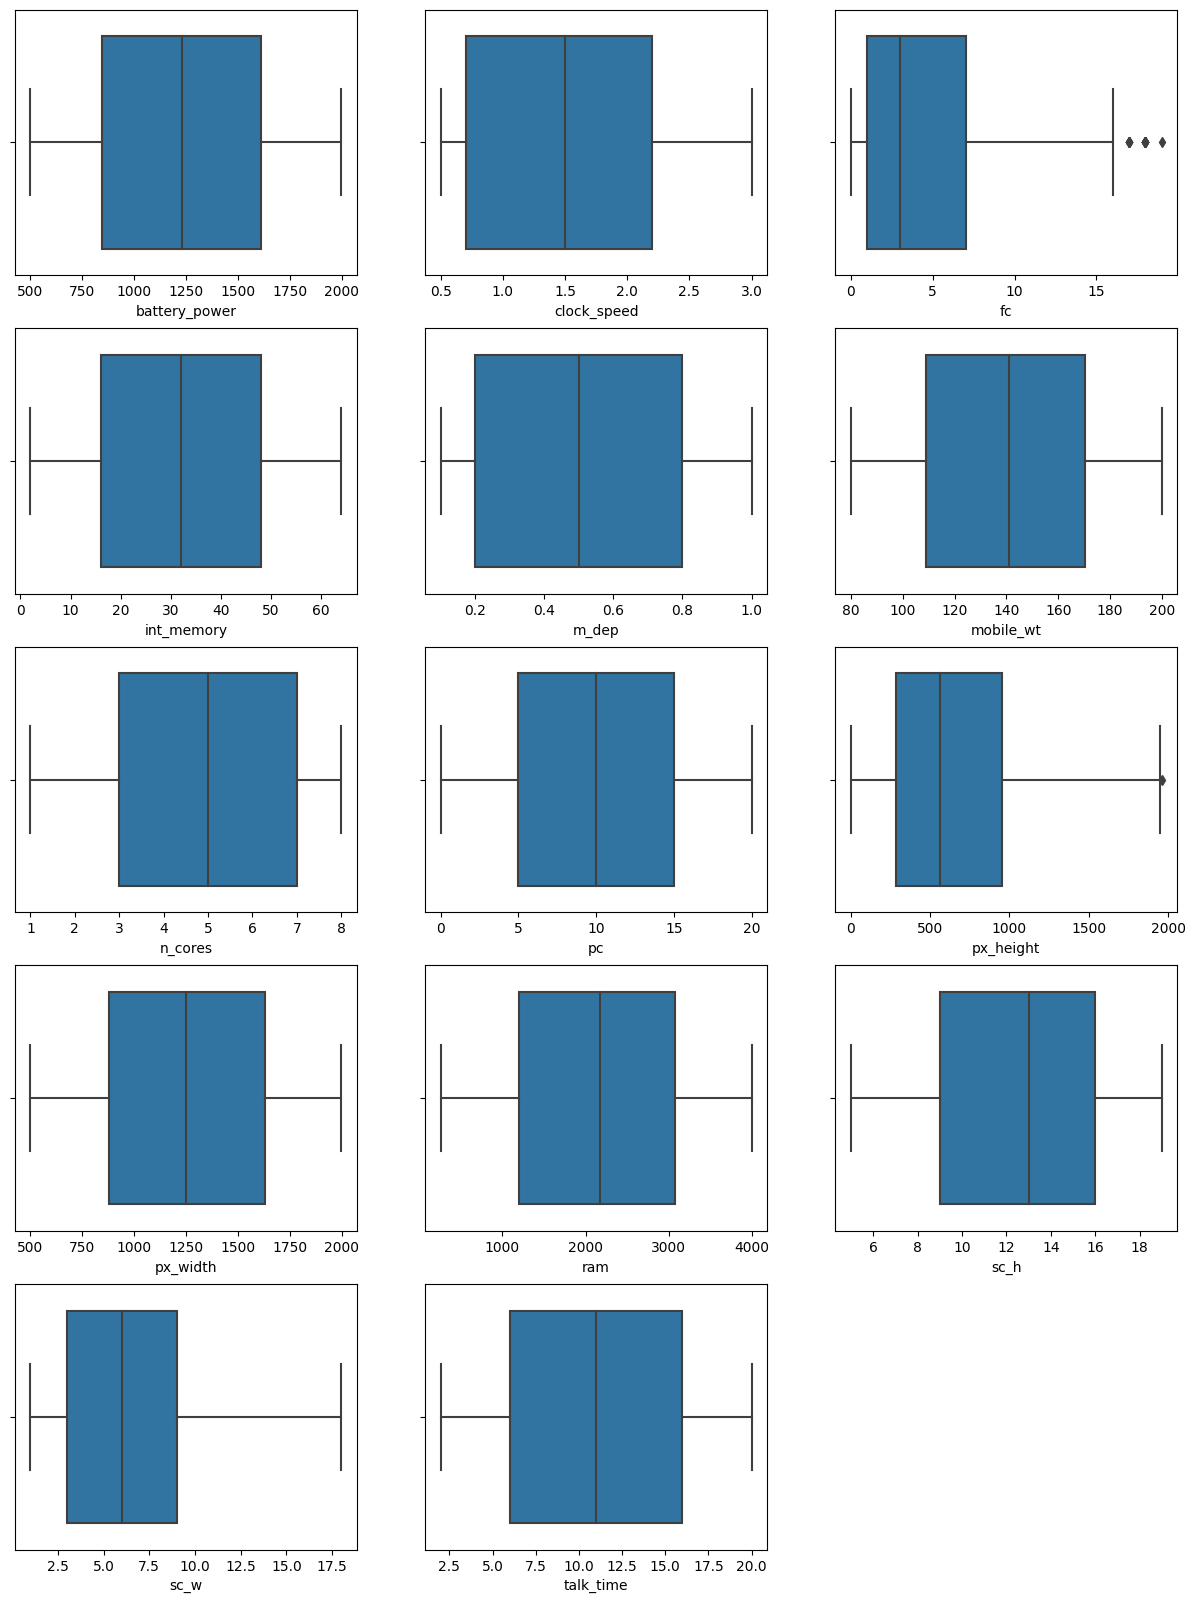

In [39]:
plt.figure(figsize=(15,20))
for i, column in enumerate(quantitative_labels.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=quantitative_labels, x=column)
    

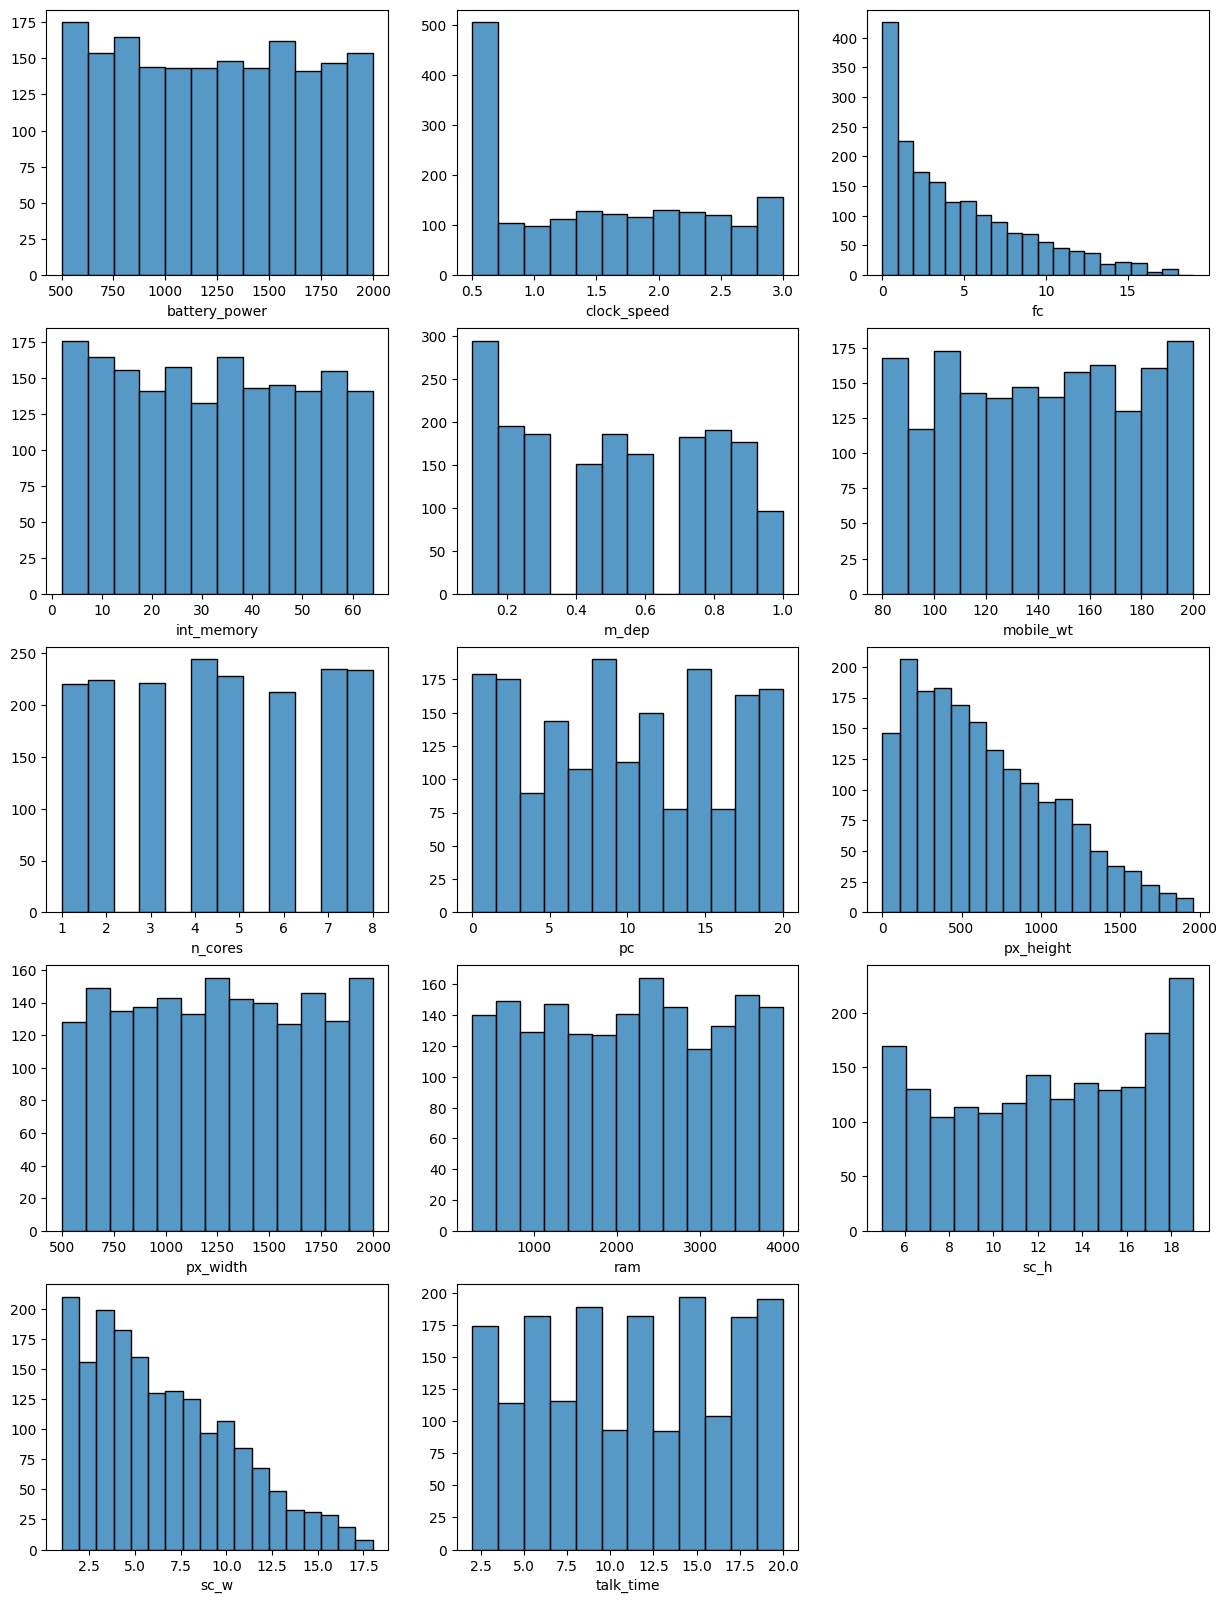

In [42]:
plt.figure(figsize=(15,20))
for i, column in enumerate(quantitative_labels.columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(quantitative_labels[column])
    plt.ylabel('')

Podemos ver que o boxplot do do fc que é equivalente à câmera principal mostra alguns outliers, podemos ver no gráfico de distribuição que os valores estão mais concentrados em valores menores. Pesquisando na internet realmente não se encontra tantos celulares com mais de 15 megapixels na câmera, sendo assim irei manter os valores que foram dados como outliers

In [13]:
qualitative_labels = df_train.drop(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'], axis=1)
qualitative_labels.head()

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1


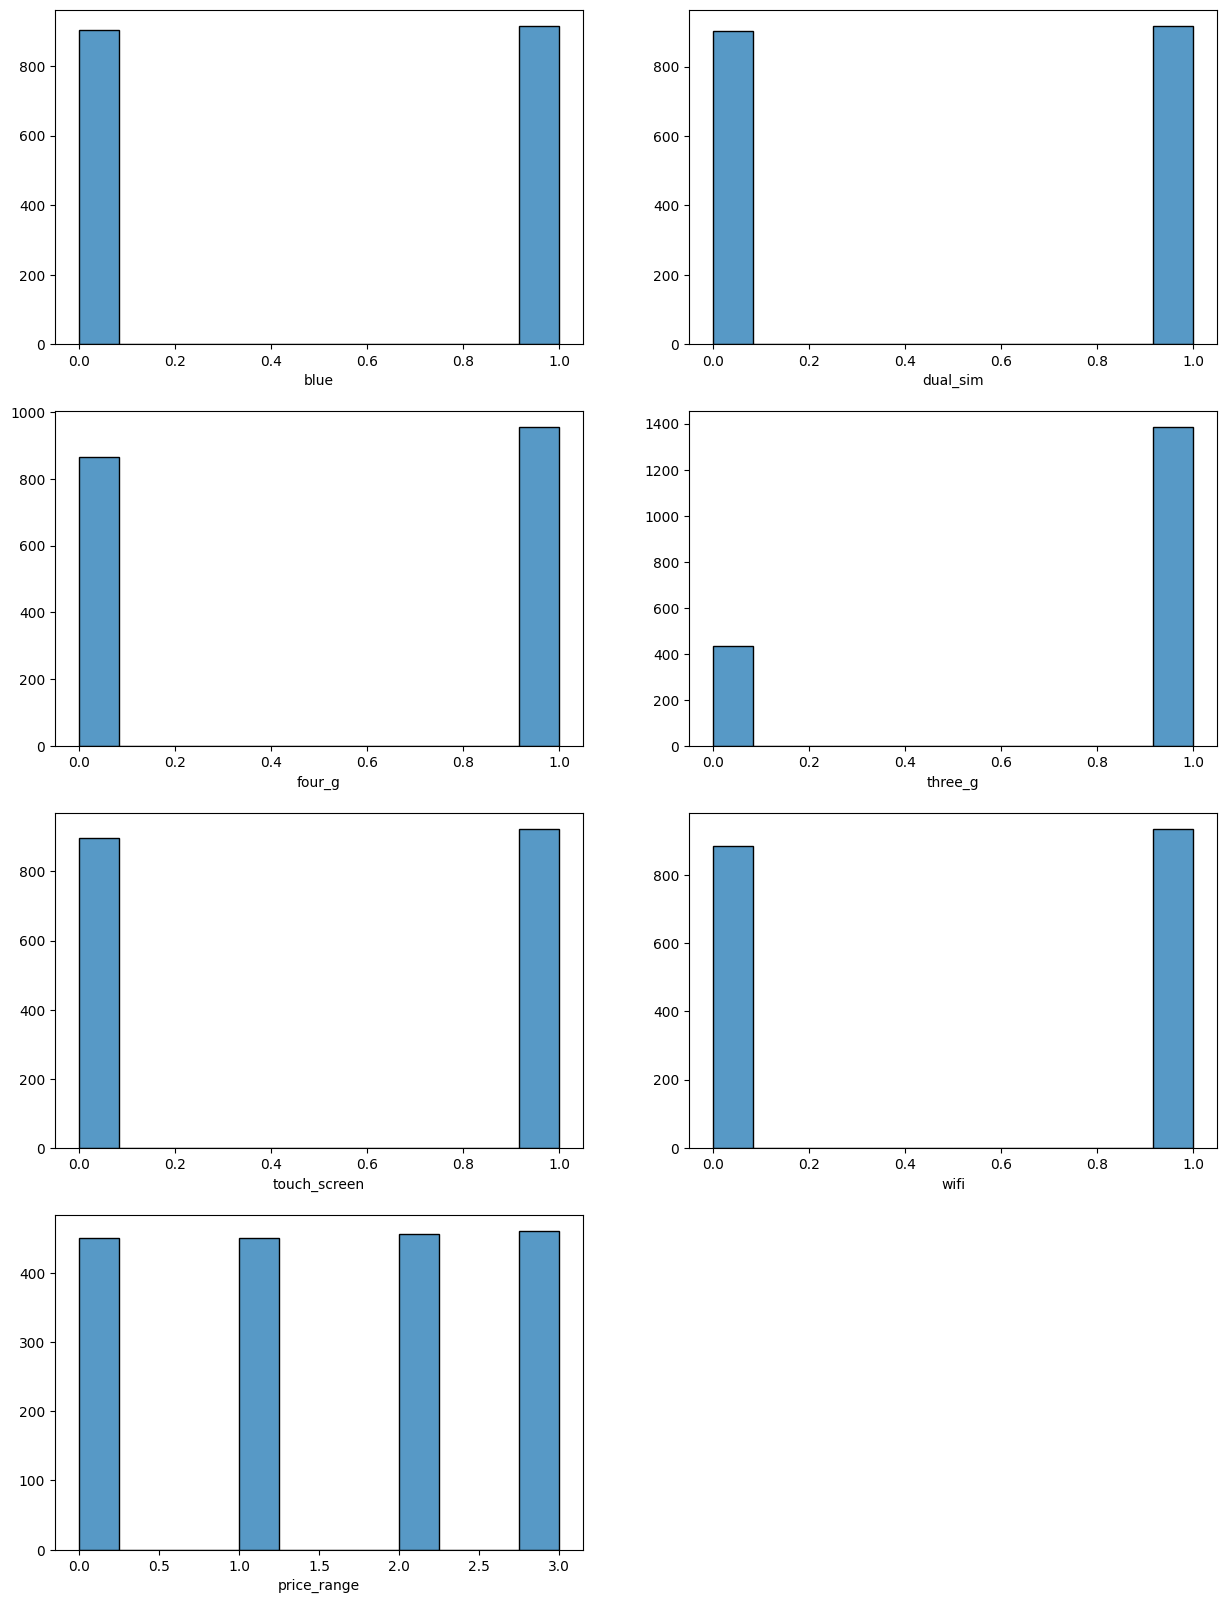

In [44]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(qualitative_labels.columns):
    plt.subplot(4, 2, i+1)
    sns.histplot(qualitative_labels[column])
    plt.ylabel('')

Mesmo havendo uma distribuição diferente no 3g irei manter esta feature, já que acho difícil hoje em dive existir um celular que não tenha no mínimo o 3g.

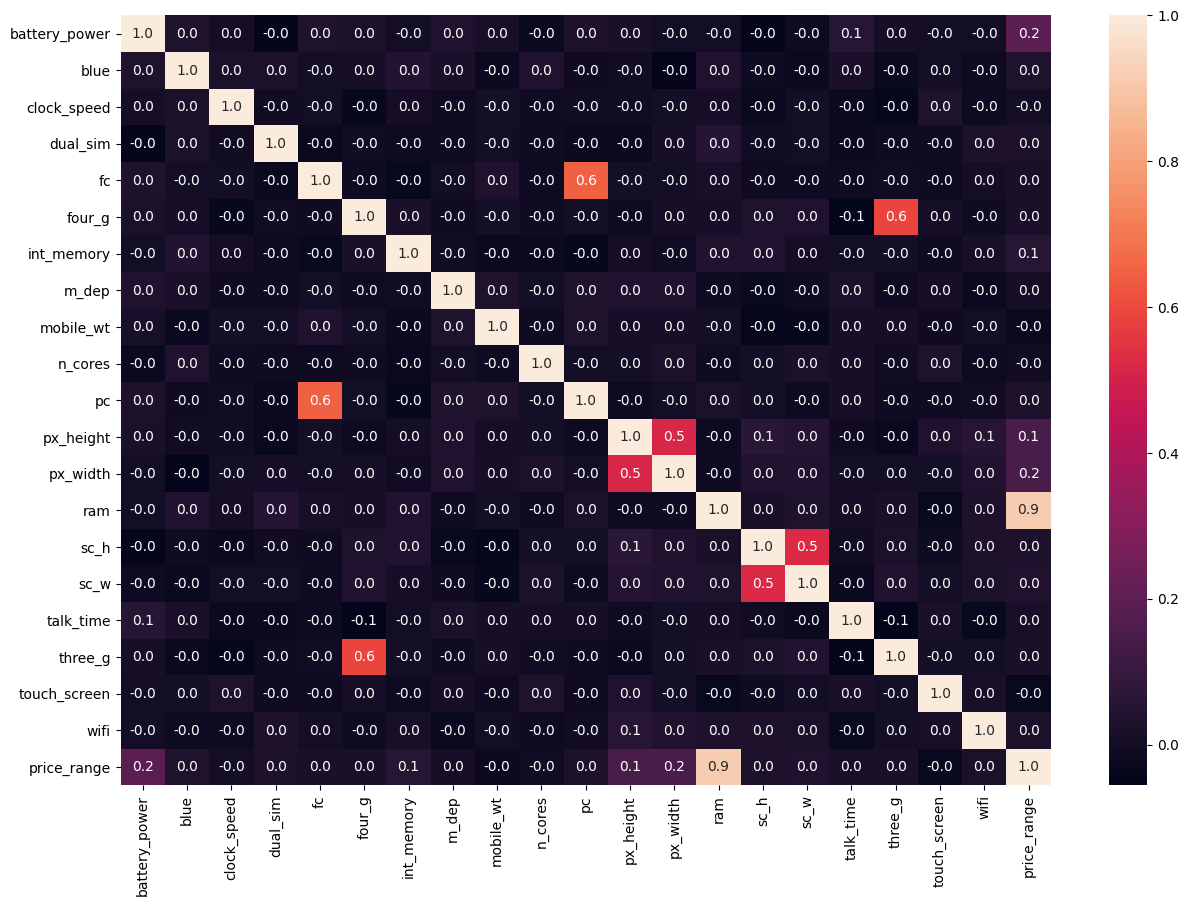

In [15]:
corr = df_train.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.1f')
plt.show()

Aparentemente a variável que mais influencia no valor de um produto é sua memória ram.  
Já em relação às outras features, podemos notar que nenhuma delas tem um valor grande de correlação entre si. Com excessão das mais óbvias.

In [16]:
seed = 0
np.random.seed(seed)

In [17]:
x = df_train.drop(['price_range'], axis=1)
y = df_train['price_range']

In [18]:
print(x.shape, y.shape)

(1819, 20) (1819,)


In [19]:
from sklearn.model_selection import train_test_split
import numpy as np

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3, stratify = y)

In [20]:
print(raw_treino_x.shape, treino_y.shape)

(1273, 20) (1273,)


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [22]:
steps = [('model', RandomForestClassifier())]
pipe_rf = Pipeline(steps)

In [23]:
cv_results_rf = cross_validate(pipe_rf, raw_treino_x, treino_y)
mean_rf = cv_results_rf['test_score'].mean()
std_rf = cv_results_rf['test_score'].std()

print('Accuracy [%.2f, %.2f]' % ((mean_rf - 1.96 * std_rf) * 100, (mean_rf + 1.96 * std_rf) * 100))

Accuracy [82.29, 89.90]


In [24]:
steps = [('model', GradientBoostingClassifier())]
pipe_gb = Pipeline(steps)
cv_results_gb = cross_validate(pipe_gb, raw_treino_x, treino_y)
mean_gb = cv_results_gb['test_score'].mean()
std_gb = cv_results_gb['test_score'].std()

print('Accuracy [%.2f, %.2f]' % ((mean_gb - 1.96 * std_gb) * 100, (mean_gb + 1.96 * std_gb) * 100))

Accuracy [85.04, 91.55]


In [46]:
steps = [('scaler', StandardScaler()),
    ('model', SVC(kernel='linear'))]
pipe_svc = Pipeline(steps)
cv_results_svc = cross_validate(pipe_svc, raw_treino_x, treino_y)
mean_svc = cv_results_svc['test_score'].mean()
std_svc = cv_results_svc['test_score'].std()

print('Accuracy [%.2f, %.2f]' % ((mean_svc - 1.96 * std_svc) * 100, (mean_svc + 1.96 * std_svc) * 100))

Accuracy [92.09, 97.54]


In [49]:
pipe_svc.fit(raw_treino_x, treino_y)
predict = pipe_svc.predict(raw_teste_x)
accuracy_score(teste_y, predict)

0.9560439560439561

In [50]:
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.naive_bayes import BernoulliNB

steps = [('transformer', RandomTreesEmbedding()),
        ('model', BernoulliNB())]
pipe_bnb = Pipeline(steps)
cv_results_bnb = cross_validate(pipe_bnb, raw_treino_x, treino_y)
mean_bnb = cv_results_bnb['test_score'].mean()
std_bnb = cv_results_bnb['test_score'].std()

print('Accuracy [%.2f, %.2f]' % ((mean_bnb - 1.96 * std_bnb) * 100, (mean_bnb + 1.96 * std_bnb) * 100))

Accuracy [64.46, 77.41]


In [51]:
from sklearn.linear_model import LogisticRegression

steps = [('scaler', StandardScaler()),
    ('model', LogisticRegression())]
pipe_logistic = Pipeline(steps)
cv_results_logistic = cross_validate(pipe_logistic, raw_treino_x, treino_y)
mean_logistic = cv_results_logistic['test_score'].mean()
std_logistic = cv_results_logistic['test_score'].std()

print('Accuracy [%.2f, %.2f]' % ((mean_logistic - 1.96 * std_logistic) * 100, (mean_logistic + 1.96 * std_logistic) * 100))

Accuracy [92.24, 97.07]


In [52]:
pipe_logistic.fit(raw_treino_x, treino_y)
predict_logistic = pipe_logistic.predict(raw_teste_x)
accuracy_score(teste_y, predict_logistic)

0.9505494505494505

Levando em conta que o modelo de Regressão e o modelo linear obtiveram resultados semelhantes, irei utilizar o que mostrou melhor desempenho computacional.     
Agora só irei treinar o modelo com todos os dados e exportar ele.

In [53]:
model = pipe_logistic.fit(x, y)

In [55]:
import joblib

joblib.dump(model, 'logistic_model.joblib')

['logistic_model.joblib']